# Visualize BioRxiv Document Embeddings

This notebook is designed to visualize umap and tsne representations of bioRxiv document embeddings.
Each document embedding is generated via an average of every word in a given article.

In [1]:
import itertools
from pathlib import Path
import re

import pandas as pd
import plotnine as p9

In [2]:
journal_map_df = pd.read_csv(
    "../exploratory_data_analysis/output/biorxiv_article_metadata.tsv", sep="\t"
)
journal_map_df.head()

,author_type,heading,category,document,doi
0,regular article,new results,genetics,440735_v1.xml,10.1101/440735
1,regular article,new results,systems biology,775270_v1.xml,10.1101/775270
2,regular article,new results,genetics,242404_v1.xml,10.1101/242404
3,regular article,new results,neuroscience,872994_v1.xml,10.1101/2019.12.11.872994
4,regular article,new results,developmental biology,080853_v2.xml,10.1101/080853


In [3]:
# Keep only current versions of articles
biorxiv_umap_models_latest = {
    "original": (
        pd.read_csv("output/embedding_output/umap/biorxiv_umap_300.tsv", sep="\t")
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "umap1": "last",
                "umap2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    ),
    "doc2vec": (
        pd.read_csv(
            "output/embedding_output/umap/biorxiv_umap_300_doc2vec.tsv", sep="\t"
        )
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "umap1": "last",
                "umap2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    ),
}

In [4]:
# Keep only current versions of articles
biorxiv_pca_models_latest = {
    "original": (
        pd.read_csv("output/embedding_output/pca/biorxiv_pca_300.tsv", sep="\t")
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "pca1": "last",
                "pca2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    ),
    "doc2vec": (
        pd.read_csv("output/embedding_output/pca/biorxiv_pca_300_doc2vec.tsv", sep="\t")
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "pca1": "last",
                "pca2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    ),
}

# UMAP of the Documents

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/umap/figures/biorxiv_umap_300.png


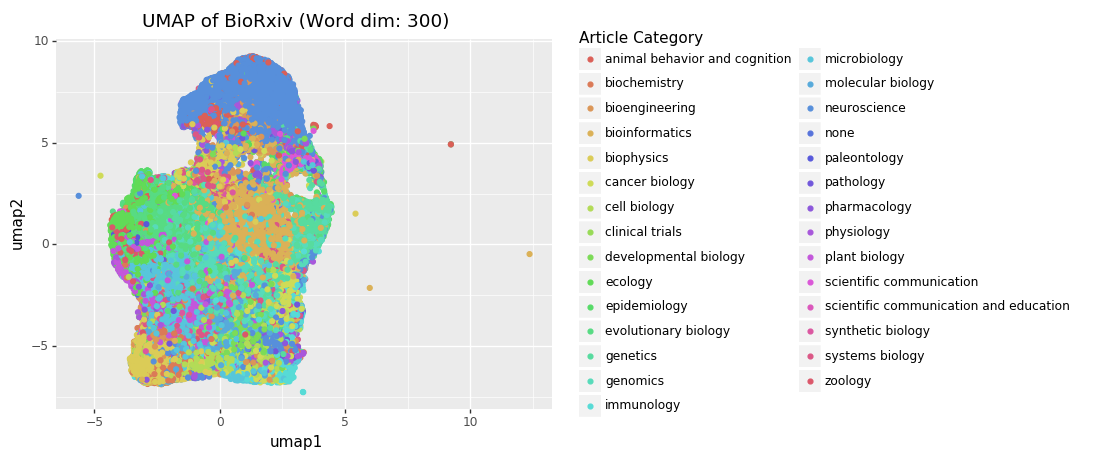

<ggplot: (-9223363251094227568)>


In [5]:
g = (
    p9.ggplot(biorxiv_umap_models_latest["original"])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="UMAP of BioRxiv (Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/umap/figures/biorxiv_umap_300.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/umap/figures/biorxiv_umap_300_doc2vec.png


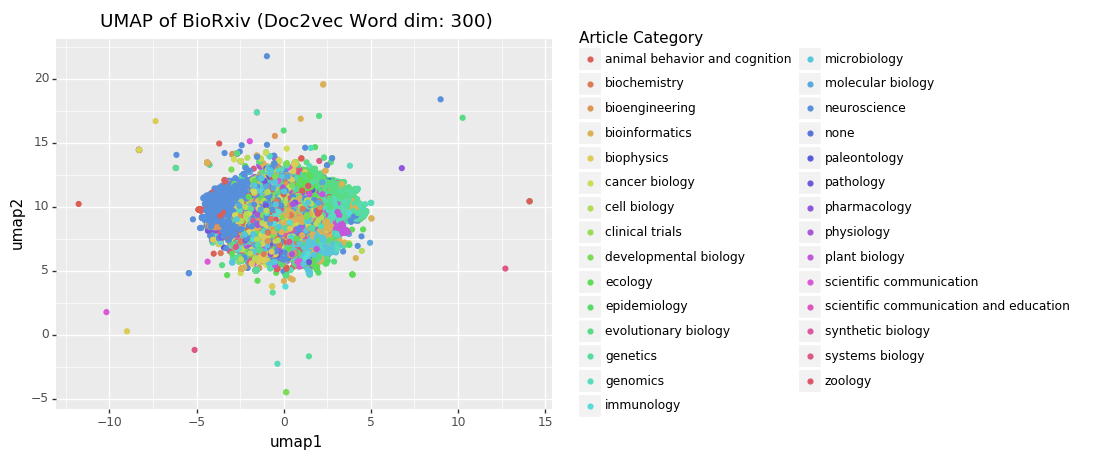

<ggplot: (8785760494498)>


In [6]:
g = (
    p9.ggplot(biorxiv_umap_models_latest["doc2vec"])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="UMAP of BioRxiv (Doc2vec Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/umap/figures/biorxiv_umap_300_doc2vec.png", dpi=500)
print(g)

# PCA of the Documents

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/pca/figures/biorxiv_pca_300.png


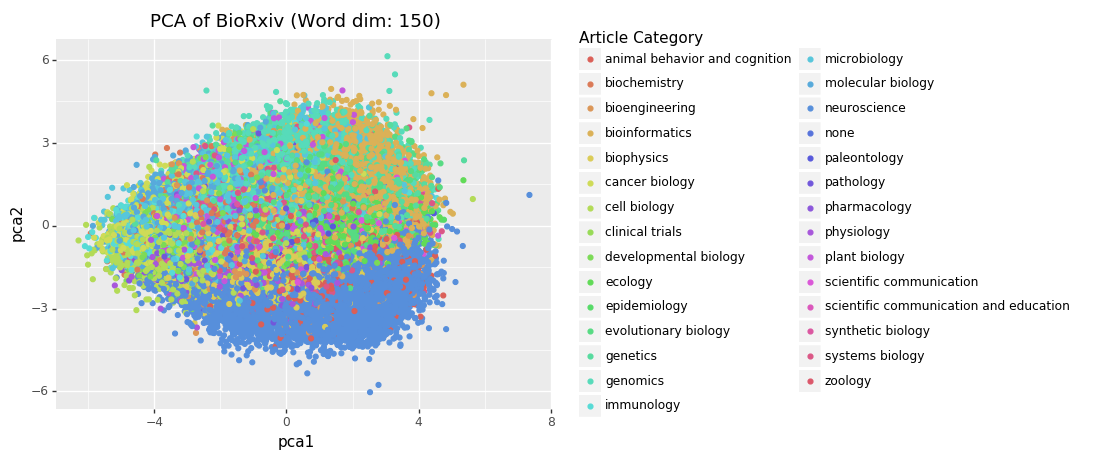

<ggplot: (-9223363251095167281)>


In [7]:
g = (
    p9.ggplot(biorxiv_pca_models_latest["original"])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="PCA of BioRxiv (Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/pca/figures/biorxiv_pca_300.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/pca/figures/biorxiv_pca_300_doc2vec.png


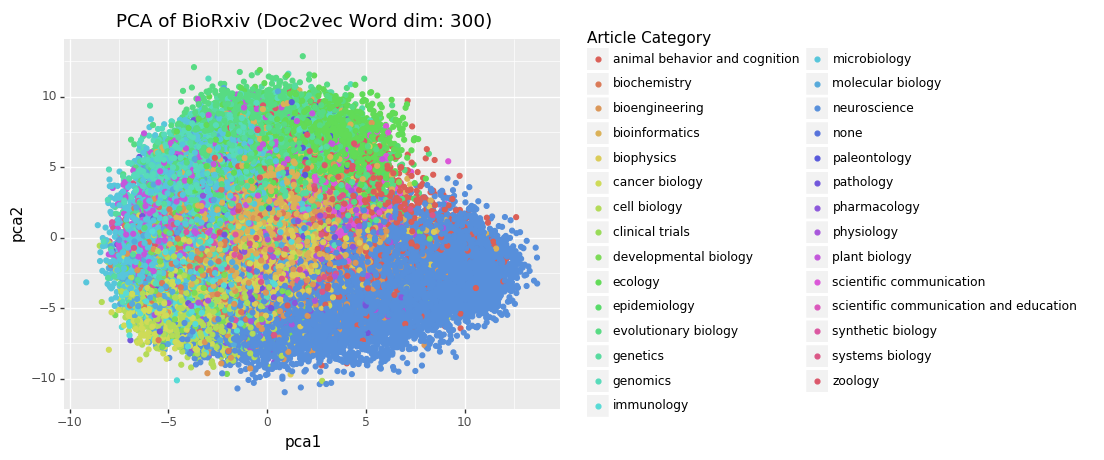

<ggplot: (-9223363251097920403)>


In [8]:
g = (
    p9.ggplot(biorxiv_pca_models_latest["doc2vec"])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="PCA of BioRxiv (Doc2vec Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/pca/figures/biorxiv_pca_300_doc2vec.png", dpi=500)
print(g)